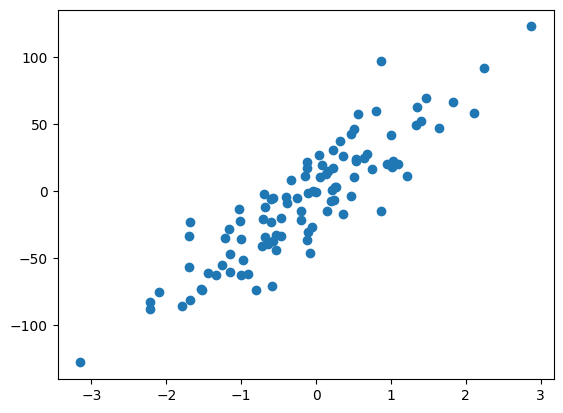

In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X,y=make_regression(n_samples=100,n_features=1,noise=20,random_state=12)
plt.scatter(X,y)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[38.47185549]
-1.5451093359356598


In [19]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[35.24979058]
-2.0100774605043217


In [20]:
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[20.09954071]
-4.196372107781507


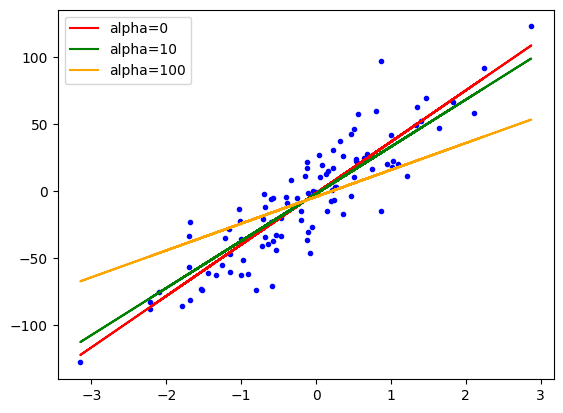

In [21]:

plt.plot(X,y,'b.')
plt.plot(X,model.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [22]:
class MeraRidge:
    def __init__(self,alpha):
        self.alpha=alpha
        self.m=None
        self.b=None
    
    def fit(self,X_train,y_train):
        num=0
        den=0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num/(den+self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        X_test = np.array(X_test)  # Ensure input is a NumPy array
        return self.m * X_test + self.b

In [23]:

reg = MeraRidge(alpha=100)

In [24]:
reg.fit(X,y)

[20.09954071] [-4.19637211]


In [25]:
#Ridge function for nD data
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

X,y=load_diabetes(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import Ridge

reg=Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2_score(y_test,y_pred))

0.46085219464119254


In [26]:
reg.coef_,reg.intercept_

(array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
        -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
         392.28931896,   79.9081772 ]),
 np.float64(151.45857456679613))

In [27]:
class MeraRidge2:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.intercept_=None
        self.coef_=None

    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        I=np.identity(X_train.shape[1])
        result=np.linalg.inv(X_train.T.dot(X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_=result[0]
        self.coef_=result[1:]

    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+self.intercept_
    

In [29]:

reg = MeraRidge2()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.460791139668318
[  42.87709893 -205.49834268  505.10960427  317.09526097 -108.51126124
  -86.2562279  -190.37246178  151.70037599  392.29679967   79.93194581]
151.4155298431294
